In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install kagglehub

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

path = kagglehub.dataset_download("yusufdelikkaya/online-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dunza\.cache\kagglehub\datasets\yusufdelikkaya\online-sales-dataset\versions\1


In [211]:
print(os.listdir(path))

['online_sales_dataset.csv']


In [212]:
# Load the CSV
csv = os.path.join(path, "online_sales_dataset.csv")
df = pd.read_csv(csv)

# Preview the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [213]:
# Familiarise with the dataset
df.info()

df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

There is a large number of **missing values**. Each column will be more closely inspected

In [35]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
49,655839,SKU_1047,Office Chair,48,2020-01-03 01:00,4.74,NaN,Belgium,0.220000,Credit Card,23.11,Accessories,Online,Not Returned,UPS,London,High
62,305041,SKU_1731,Desk Lamp,45,2020-01-03 14:00,54.79,NaN,United Kingdom,0.230000,Credit Card,8.97,Accessories,In-store,Not Returned,DHL,NaN,Medium
71,672843,SKU_1953,Headphones,3,2020-01-03 23:00,99.17,NaN,United States,0.030000,paypall,11.58,Stationery,Online,Not Returned,DHL,London,Medium
103,124300,SKU_1951,Headphones,8,2020-01-05 07:00,46.19,NaN,Norway,0.100000,Bank Transfer,12.81,Stationery,In-store,Not Returned,UPS,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49739,106493,SKU_1736,Desk Lamp,-40,2025-09-03 11:00,-51.34,NaN,Netherlands,0.230000,Bank Transfer,NaN,Accessories,In-store,Not Returned,FedEx,NaN,Medium
49749,540459,SKU_1405,White Mug,-36,2025-09-03 21:00,12.21,NaN,Portugal,0.290000,paypall,NaN,Stationery,Online,Not Returned,UPS,NaN,High
49760,726763,SKU_1273,White Mug,-34,2025-09-04 08:00,10.34,NaN,France,0.350000,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,High
49761,829071,SKU_1000,Wall Clock,1,2025-09-04 09:00,27.81,NaN,Sweden,0.390000,Bank Transfer,7.40,Apparel,In-store,Not Returned,DHL,NaN,Low


In [36]:
df[df['ShippingCost'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
144,451279,SKU_1617,Wall Clock,-2,2020-01-07 00:00,34.06,NaN,Spain,0.340000,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,Medium
147,747972,SKU_1514,Desk Lamp,-26,2020-01-07 03:00,-72.33,NaN,Netherlands,1.972087,paypall,NaN,Electronics,In-store,Not Returned,Royal Mail,NaN,Low
167,318969,SKU_1115,Desk Lamp,-19,2020-01-07 23:00,-3.61,NaN,Italy,1.052254,Credit Card,NaN,Apparel,In-store,Not Returned,UPS,NaN,High
176,285340,SKU_1710,Blue Pen,-3,2020-01-08 08:00,85.95,NaN,Netherlands,0.260000,Credit Card,NaN,Accessories,In-store,Not Returned,UPS,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,487771,SKU_1083,Wall Clock,-7,2025-09-03 02:00,-57.31,NaN,United Kingdom,1.139869,paypall,NaN,Accessories,Online,Not Returned,DHL,NaN,Low
49739,106493,SKU_1736,Desk Lamp,-40,2025-09-03 11:00,-51.34,NaN,Netherlands,0.230000,Bank Transfer,NaN,Accessories,In-store,Not Returned,FedEx,NaN,Medium
49749,540459,SKU_1405,White Mug,-36,2025-09-03 21:00,12.21,NaN,Portugal,0.290000,paypall,NaN,Stationery,Online,Not Returned,UPS,NaN,High
49760,726763,SKU_1273,White Mug,-34,2025-09-04 08:00,10.34,NaN,France,0.350000,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,High


In [37]:
df[df['WarehouseLocation'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
62,305041,SKU_1731,Desk Lamp,45,2020-01-03 14:00,54.79,NaN,United Kingdom,0.230000,Credit Card,8.97,Accessories,In-store,Not Returned,DHL,NaN,Medium
103,124300,SKU_1951,Headphones,8,2020-01-05 07:00,46.19,NaN,Norway,0.100000,Bank Transfer,12.81,Stationery,In-store,Not Returned,UPS,NaN,High
144,451279,SKU_1617,Wall Clock,-2,2020-01-07 00:00,34.06,NaN,Spain,0.340000,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,Medium
147,747972,SKU_1514,Desk Lamp,-26,2020-01-07 03:00,-72.33,NaN,Netherlands,1.972087,paypall,NaN,Electronics,In-store,Not Returned,Royal Mail,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49739,106493,SKU_1736,Desk Lamp,-40,2025-09-03 11:00,-51.34,NaN,Netherlands,0.230000,Bank Transfer,NaN,Accessories,In-store,Not Returned,FedEx,NaN,Medium
49749,540459,SKU_1405,White Mug,-36,2025-09-03 21:00,12.21,NaN,Portugal,0.290000,paypall,NaN,Stationery,Online,Not Returned,UPS,NaN,High
49760,726763,SKU_1273,White Mug,-34,2025-09-04 08:00,10.34,NaN,France,0.350000,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,High
49761,829071,SKU_1000,Wall Clock,1,2025-09-04 09:00,27.81,NaN,Sweden,0.390000,Bank Transfer,7.40,Apparel,In-store,Not Returned,DHL,NaN,Low


In [54]:
in_store = df[df['SalesChannel'] == 'In-store']

columns_to_check = ['CustomerID', 'ShippingCost', 'WarehouseLocation']

for col in columns_to_check:
    missing_count = in_store[col].isnull().sum()
    total = len(in_store)
    print(f"{col}: {missing_count} missing")

CustomerID: 2447 missing
ShippingCost: 1200 missing
WarehouseLocation: 1699 missing


After closely inspecting data, it is noticable that a large portion or **missing values** is associated with **In-store purchases**. The **missing values** will be replaced as follows:
- **CustomerID** = In-store
- **ShippingCost** = 0
- **WarehouseLocation** = Store

In [57]:
df.loc[(df['CustomerID'].isnull()) & (df['SalesChannel'] == 'In-store'), 'CustomerID'] = 'In-store'

df.loc[(df['ShippingCost'].isnull()) & (df['SalesChannel'] == 'In-store'), 'ShippingCost'] = 0

df.loc[(df['WarehouseLocation'].isnull()) & (df['SalesChannel'] == 'In-store'), 'WarehouseLocation'] = 'Store'

df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           2531
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         1289
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    1786
OrderPriority           0
dtype: int64

The **missing values** are reduced dramatically. To adrerss the rest of the **missing values**, they will be manipulated as follows:

- **CustomerID** - will be deleted as it is main identifyer in the dataset and clarification from author of the dataset is not possible.

- **ShippingCost** - will assign mean value

- **WarehouseLocation** - will assign Unknown

In [60]:
df = df.dropna(subset=['CustomerID'])

df.loc[:,'ShippingCost'] = df['ShippingCost'].fillna(df['ShippingCost'].mean())

df.loc[:,'WarehouseLocation'] = df['WarehouseLocation'].fillna('Unknown')

df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64

Confirmed 0 **mssing values** in the dataset

In [62]:
df.duplicated().sum()

np.int64(0)

**No duplicates** in the dataset

In [64]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,Discount,ShippingCost
count,47251.000000,47251.000000,47251.000000,47251.000000,47251.000000
mean,550101.441663,23.627204,49.039178,0.263582,17.038332
std,260664.136197,16.197809,31.232059,0.193749,7.639086
min,100005.000000,-50.000000,-99.860000,0.000000,0.000000
25%,324253.000000,12.000000,24.770000,0.130000,10.740000
50%,551355.000000,24.000000,49.640000,0.250000,17.140000
75%,775612.500000,37.000000,75.030000,0.380000,23.560000
max,999997.000000,49.000000,100.000000,1.998946,30.000000


Descibe method revealed **Minimum Quantity of -50** which draws attention.

In [66]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,In-store,United Kingdom,1.501433,Bank Transfer,0.0,Electronics,In-store,Not Returned,FedEx,Store,Medium
147,747972,SKU_1514,Desk Lamp,-26,2020-01-07 03:00,-72.33,In-store,Netherlands,1.972087,paypall,0.0,Electronics,In-store,Not Returned,Royal Mail,Store,Low
167,318969,SKU_1115,Desk Lamp,-19,2020-01-07 23:00,-3.61,In-store,Italy,1.052254,Credit Card,0.0,Apparel,In-store,Not Returned,UPS,Store,High
176,285340,SKU_1710,Blue Pen,-3,2020-01-08 08:00,85.95,In-store,Netherlands,0.260000,Credit Card,0.0,Accessories,In-store,Not Returned,UPS,Store,Low
292,212547,SKU_1552,Wall Clock,-26,2020-01-13 04:00,-51.94,In-store,Norway,1.523467,Credit Card,0.0,Stationery,In-store,Not Returned,FedEx,Store,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,622187,SKU_1197,USB Cable,-8,2025-08-31 02:00,91.33,In-store,Spain,0.280000,Credit Card,0.0,Stationery,In-store,Returned,Royal Mail,Store,Medium
49695,855821,SKU_1500,Wireless Mouse,-11,2025-09-01 15:00,-18.88,In-store,Portugal,1.569082,Bank Transfer,0.0,Furniture,In-store,Not Returned,FedEx,Store,Low
49697,774988,SKU_1719,T-shirt,-5,2025-09-01 17:00,80.79,In-store,Spain,0.100000,paypall,0.0,Electronics,In-store,Not Returned,DHL,Store,High
49718,745888,SKU_1224,T-shirt,-2,2025-09-02 14:00,-84.25,In-store,United States,1.420665,Bank Transfer,0.0,Accessories,In-store,Not Returned,Royal Mail,Store,Medium


Rows with **Quantity < 0** will be dropped as it is not clear why. Most are not marked as returned.

In [217]:
rows_to_drop = df[df['Quantity'] < 0].index

df = df.drop(rows_to_drop)

df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium
6,210268,SKU_1087,USB Cable,25,2020-01-01 06:00:00,85.74,46567.0,Belgium,0.15,Bank Transfer,12.92,Stationery,Online,Not Returned,FedEx,Amsterdam,High
7,832180,SKU_1597,Notebook,8,2020-01-01 07:00:00,95.65,75098.0,Norway,0.04,Bank Transfer,6.48,Electronics,In-store,Not Returned,Royal Mail,Amsterdam,Low
8,154886,SKU_1907,Wireless Mouse,19,2020-01-01 08:00:00,98.19,87950.0,Belgium,0.05,paypall,12.56,Apparel,Online,Not Returned,UPS,Berlin,High
9,237337,SKU_1866,Headphones,40,2020-01-01 09:00:00,98.17,39718.0,Italy,0.16,Bank Transfer,7.71,Apparel,Online,Not Returned,Royal Mail,London,Low
10,621430,SKU_1144,Notebook,49,2020-01-01 10:00:00,87.56,13030.0,United Kingdom,0.19,paypall,9.83,Stationery,In-store,Returned,UPS,Paris,Medium


Now the dataset is cleaned and ready for **Exloratory Analysis** starting with **Total Sales**

In [218]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])

sum_of_sales = df['TotalSales'].sum()
print(f"TotalSales: €{sum_of_sales:,.2f}")

TotalSales: €44,633,694.47


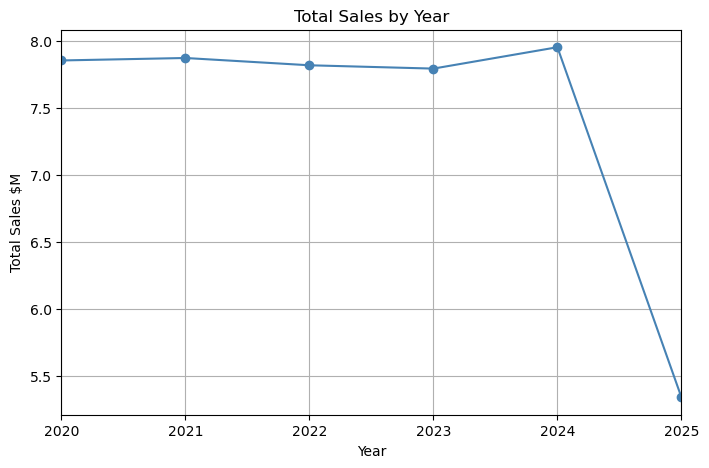

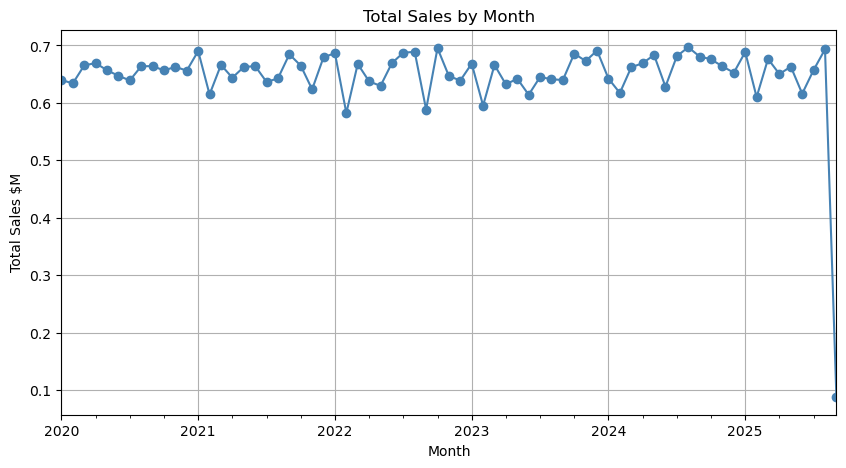

In [219]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalSalesM'] = df['TotalSales'] / 1000000

sales_by_year = df.groupby(df['InvoiceDate'].dt.to_period('Y'))['TotalSalesM'].sum()
sales_by_month = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSalesM'].sum()

sales_by_year.plot(marker='o', color='steelblue', figsize=(8,5), title='Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales $M')
plt.grid(True)
plt.show()

sales_by_month.plot(marker='o', color='steelblue', figsize=(10,5), title='Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales $M')
plt.grid(True)
plt.show()

**Steady sales** are observed across the year with a slight slump in year **2022-2023**. Sales seem to drop sharpy in 2025, but this is caused by incomplete data for the year and will be ignored.

In [220]:
product_count = df.groupby(['Category', 'Description']).size().reset_index(name='Count')

top_5_products = product_count.sort_values(['Category', 'Count'], ascending=[True, False]).groupby('Category')
print(top_5_products.head(5))

       Category     Description  Count
8   Accessories      Wall Clock    896
9   Accessories       White Mug    884
0   Accessories        Backpack    883
4   Accessories        Notebook    877
5   Accessories    Office Chair    872
18      Apparel       USB Cable    887
17      Apparel         T-shirt    876
14      Apparel      Headphones    873
13      Apparel       Desk Lamp    868
12      Apparel        Blue Pen    867
29  Electronics       USB Cable    907
30  Electronics      Wall Clock    882
24  Electronics       Desk Lamp    868
28  Electronics         T-shirt    868
25  Electronics      Headphones    860
33    Furniture        Backpack    930
35    Furniture       Desk Lamp    898
43    Furniture  Wireless Mouse    894
42    Furniture       White Mug    877
38    Furniture    Office Chair    875
53   Stationery       White Mug    887
49   Stationery    Office Chair    879
52   Stationery      Wall Clock    879
45   Stationery        Blue Pen    877
48   Stationery        No

Research for top selling products revealed **products under wrong categories.** This will be addressed.

In [221]:
df['Description'].unique()

array(['White Mug', 'Headphones', 'Desk Lamp', 'Office Chair',
       'USB Cable', 'Notebook', 'Wireless Mouse', 'Blue Pen',
       'Wall Clock', 'T-shirt', 'Backpack'], dtype=object)

In [222]:
category_map = {
    'White Mug': 'Accessories',
    'Headphones': 'Electronics',
    'Desk Lamp': 'Furniture',
    'Office Chair': 'Furniture',
    'USB Cable': 'Electronics',
    'Notebook': 'Stationery',
    'Wireless Mouse': 'Electronics',
    'Blue Pen': 'Stationery',
    'Wall Clock': 'Furniture',
    'T-shirt': 'Apparel',
    'Backpack': 'Accessories'
}

df['Category'] = df['Description'].map(category_map)

df.groupby('Description')['Category'].unique()

Description
Backpack          [Accessories]
Blue Pen           [Stationery]
Desk Lamp           [Furniture]
Headphones        [Electronics]
Notebook           [Stationery]
Office Chair        [Furniture]
T-shirt               [Apparel]
USB Cable         [Electronics]
Wall Clock          [Furniture]
White Mug         [Accessories]
Wireless Mouse    [Electronics]
Name: Category, dtype: object

In [223]:
product_count_upd = df.groupby(['Category', 'Description']).size().reset_index(name='Count')

top_5_products_upd = product_count_upd.sort_values(['Category', 'Count'], ascending=[True, False]).groupby('Category')
print(top_5_products_upd.head(5))

       Category     Description  Count
0   Accessories        Backpack   4355
1   Accessories       White Mug   4318
2       Apparel         T-shirt   4268
4   Electronics       USB Cable   4359
3   Electronics      Headphones   4282
5   Electronics  Wireless Mouse   4216
8     Furniture      Wall Clock   4362
6     Furniture       Desk Lamp   4338
7     Furniture    Office Chair   4301
9    Stationery        Blue Pen   4264
10   Stationery        Notebook   4230


**Products are now under corect Categories.** Next, visualizations of distribution of sales:

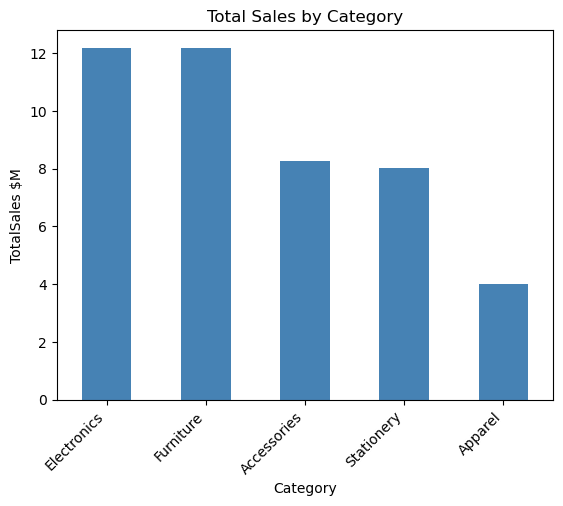

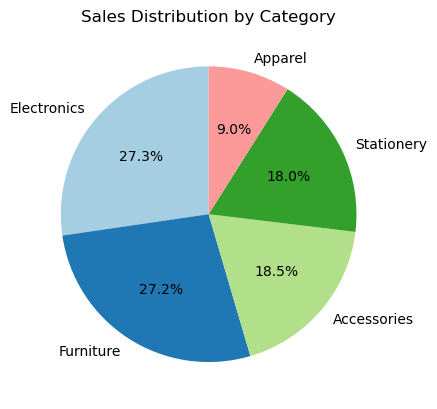

In [224]:
sales_by_category = df.groupby('Category')['TotalSalesM'].sum().sort_values(ascending=False)

sales_by_category.plot(kind='bar', color='steelblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('TotalSales $M')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Category')
plt.show()

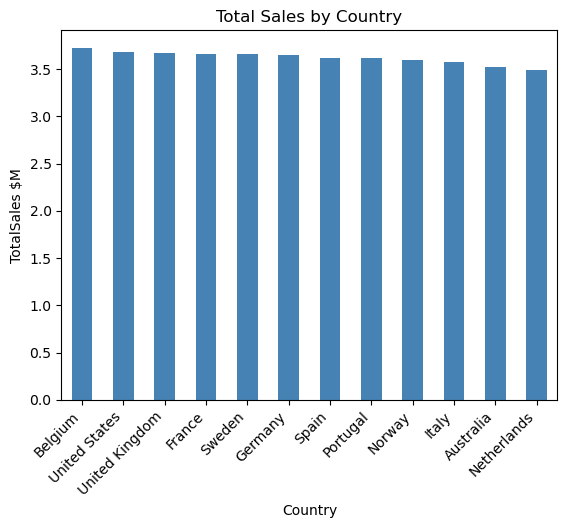

In [198]:
sales_by_country = df.groupby('Country')['TotalSalesM'].sum().sort_values(ascending=False)

sales_by_country.plot(kind='bar', color='steelblue')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('TotalSales $M')
plt.xticks(rotation=45, ha='right')
plt.show()

**Payment distribution by Payment Method** visualized:

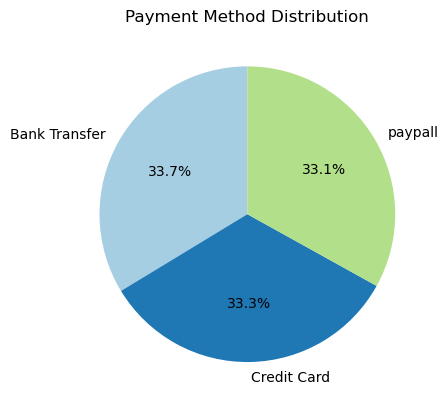

In [170]:
payment_method = df['PaymentMethod'].value_counts()

plt.pie(payment_method, labels=payment_method.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired.colors)
plt.title('Payment Method Distribution')
plt.show()

Next, I will check the **ReturnStatus** column to understand its distribution and impact.

In [171]:
total_orders = len(df)
returned_orders = len(df[df['ReturnStatus'] == 'Returned'])
return_percentage = (returned_orders / total_orders) *100

print(f"Overall Return Percentage: {return_percentage:.2f}%")

Overall Return Percentage: 9.80%


In [172]:
returns_by_cat = df[df['ReturnStatus'] == 'Returned'].groupby('Category').size()
cat_total = df.groupby('Category').size()

return_percentage_cat = (returns_by_cat / cat_total *100)

print("\nReturn Percentage by Category:")
print(return_percentage_cat)


Return Percentage by Category:
Category
Accessories     9.535655
Apparel        10.110471
Electronics     9.741297
Furniture       9.652174
Stationery     10.240600
dtype: float64


In [173]:
channel_total = df.groupby('SalesChannel').size()
returns_by_channel = df[df['ReturnStatus'] == 'Returned'].groupby('SalesChannel').size()
channel_return_percentage = (returns_by_channel / channel_total *100)

return_summary = pd.DataFrame({
    'Total Orders': channel_total,
    'Returned Orders': returns_by_channel,
    'Return Rate (%)': channel_return_percentage
})

print(return_summary)

              Total Orders  Returned Orders  Return Rate (%)
SalesChannel                                                
In-store             23531             2321         9.863584
Online               22520             2193         9.738011


**Returns are spread evenly** across the **Categories and SalesChannels** with no outliers. Next I will explore **Discount** data.

In [174]:
df['Discount'].describe()

count    46051.000000
mean         0.250586
std          0.144299
min          0.000000
25%          0.130000
50%          0.250000
75%          0.380000
max          0.500000
Name: Discount, dtype: float64

In [175]:
corr = df['Discount'].corr(df['UnitPrice'])
print("Correlation between Discount and UnitPrice:", corr)

Correlation between Discount and UnitPrice: -0.004926894866173256


As **correlation is very close to 0**, we can conclude that there is **no correlation between Discount and UnitPrice**

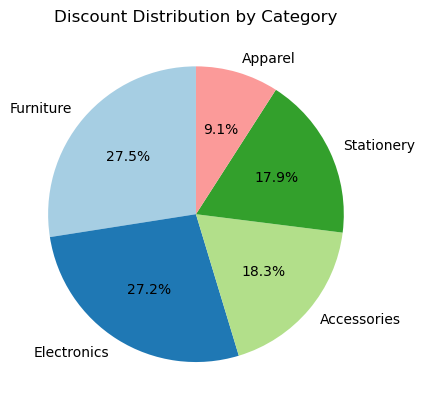

In [201]:
discount_distribution = df.groupby('Category')['Discount'].sum().sort_values(ascending=False)

plt.pie(discount_distribution, labels=discount_distribution.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired.colors)
plt.title('Discount Distribution by Category')
plt.show()

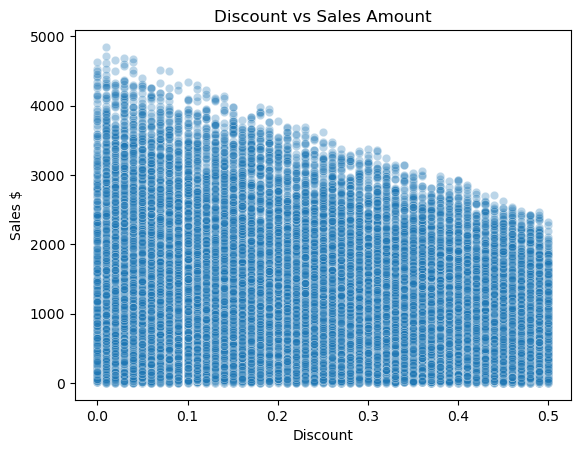

In [227]:
sns.scatterplot(x='Discount', y='TotalSales', data=df, alpha=0.3)
plt.title('Discount vs Sales Amount')
plt.xlabel('Discount')
plt.ylabel('Sales $')
plt.show()

Analysis revealed that **most of the Discounts occur within Furniture and Electronics** categories. Additionally, the **largest Discounts are applied to lower half of the sales by value.**

In [176]:
df['ShippingCost'].describe()

count    46051.000000
mean        17.482318
std          7.219019
min          5.000000
25%         11.210000
50%         17.470000
75%         23.710000
max         30.000000
Name: ShippingCost, dtype: float64

In [177]:
df['ShipmentProvider'].value_counts()

ShipmentProvider
FedEx         11600
DHL           11500
Royal Mail    11481
UPS           11470
Name: count, dtype: int64

In [178]:
df.groupby('ShipmentProvider')['ShippingCost'].agg(['mean', 'median', 'count'])

,mean,median,count
ShipmentProvider,,,
DHL,17.429445,17.41,11500
FedEx,17.547588,17.58,11600
Royal Mail,17.544923,17.56,11481
UPS,17.406655,17.36,11470


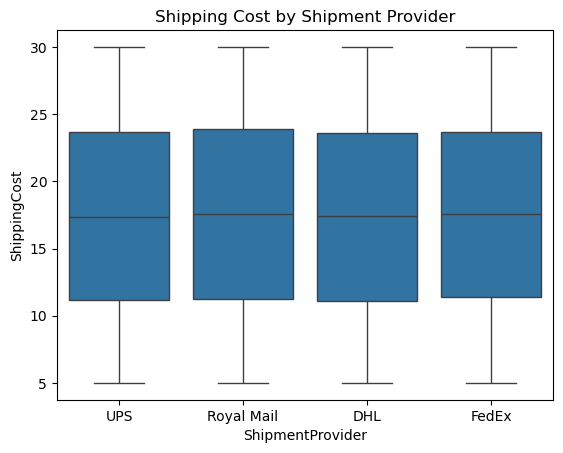

In [179]:

sns.boxplot(x='ShipmentProvider', y='ShippingCost', data=df)
plt.title('Shipping Cost by Shipment Provider')
plt.show()

In [180]:
providers = df.groupby(['Country', 'ShipmentProvider']).size().reset_index(name='Count')

top_providers = providers.sort_values(['Country','Count'],ascending=[True, False]).groupby('Country').head(1)

print(top_providers)

           Country ShipmentProvider  Count
2        Australia       Royal Mail    997
4          Belgium              DHL    982
11          France              UPS   1022
13         Germany            FedEx   1003
19           Italy              UPS    948
21     Netherlands            FedEx   1023
24          Norway              DHL    990
29        Portugal            FedEx   1019
35           Spain              UPS    993
37          Sweden            FedEx   1015
41  United Kingdom            FedEx   1000
45   United States            FedEx    961


**ShippingProvider** column analysis revealed a **very close distribution of shipping cost** across the four providers. Although **Shipping Providers** are **simiar in the number of orders, FedEx leads** as the most popular provider in most countries. **No outliers** were observed during analysis.